In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, accuracy_score

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Microsoft SC - Data Science/Final Project -  NEO Hazardous Objects Prediction/nearest-earth-objects(1910-2024).csv')

In [ ]:
copy_data = data.copy()
copy_data.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [ ]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


# **Data Cleaning**

In [ ]:
copy_data.isnull().sum()

,0
neo_id,0
name,0
absolute_magnitude,28
estimated_diameter_min,28
estimated_diameter_max,28
orbiting_body,0
relative_velocity,0
miss_distance,0
is_hazardous,0


In [ ]:
copy_data.dropna(inplace=True)

In [ ]:
copy_data.isnull().sum()

,0
neo_id,0
name,0
absolute_magnitude,0
estimated_diameter_min,0
estimated_diameter_max,0
orbiting_body,0
relative_velocity,0
miss_distance,0
is_hazardous,0


In [ ]:
copy_data['orbiting_body'].unique()

array(['Earth'], dtype=object)

In [ ]:
copy_data = copy_data.drop(['orbiting_body', 'neo_id', 'name'], axis=1)
copy_data.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,False
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,True
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,False
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,False
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,False


# **EDA**

In [ ]:
percentage_dist = copy_data['is_hazardous'].value_counts(normalize=True) * 100
print(percentage_dist)

is_hazardous
False    87.236635
True     12.763365
Name: proportion, dtype: float64


87% of the nearing objects were identified as non-hazardous

**continuous variables distribution**

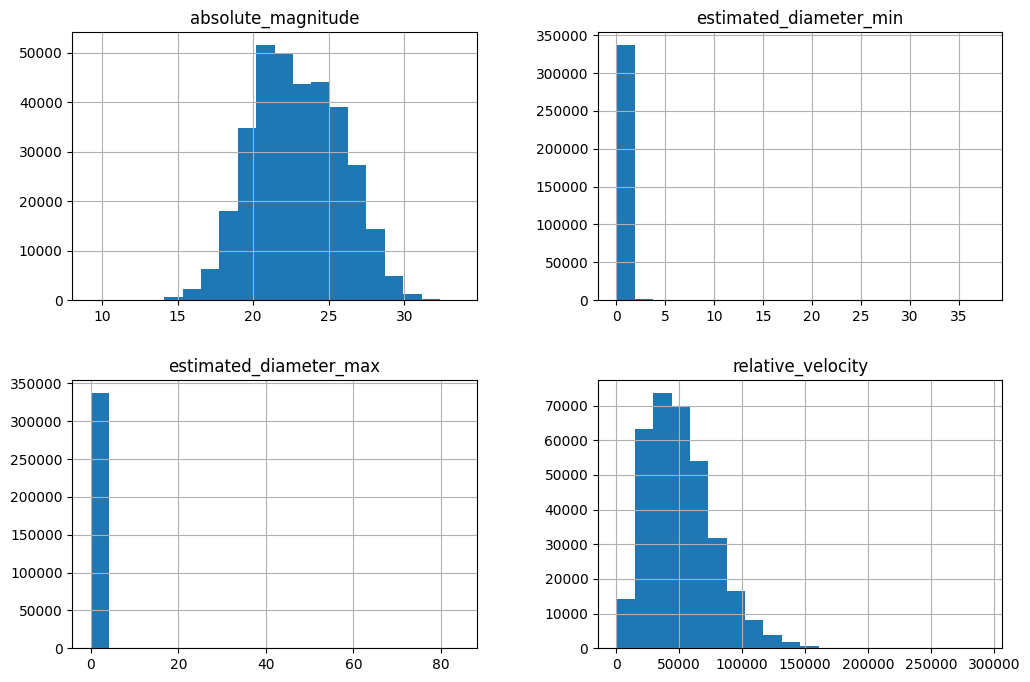

In [ ]:
copy_data[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity']].hist(bins=20, figsize=(12, 8))
plt.show()

**identifying outliers**

In [ ]:
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=copy_data[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity']])
# plt.show()

# columns = ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity']

# for column in columns:
#     plt.figure(figsize=(10, 4))
#     sns.boxplot(data=copy_data[column])
#     plt.title(f'Boxplot of {column}')
#     plt.show()

In [ ]:
# copy_data = copy_data[copy_data['relative_velocity'] < 200000]

**identifying relationships between features**

In [ ]:
# plt.figure(figsize=(8, 6))
# sns.heatmap(copy_data[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity']].corr(), annot=True, cmap='coolwarm')
# plt.show()

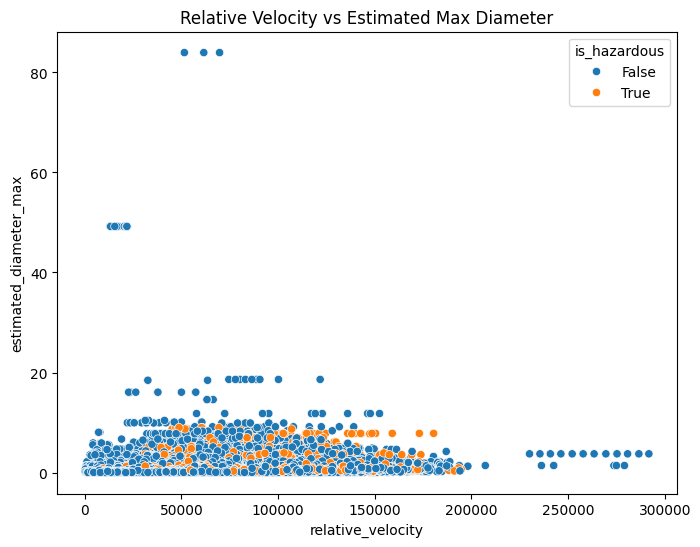

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='relative_velocity', y='estimated_diameter_max', hue='is_hazardous', data=copy_data)
plt.title('Relative Velocity vs Estimated Max Diameter')
plt.show()

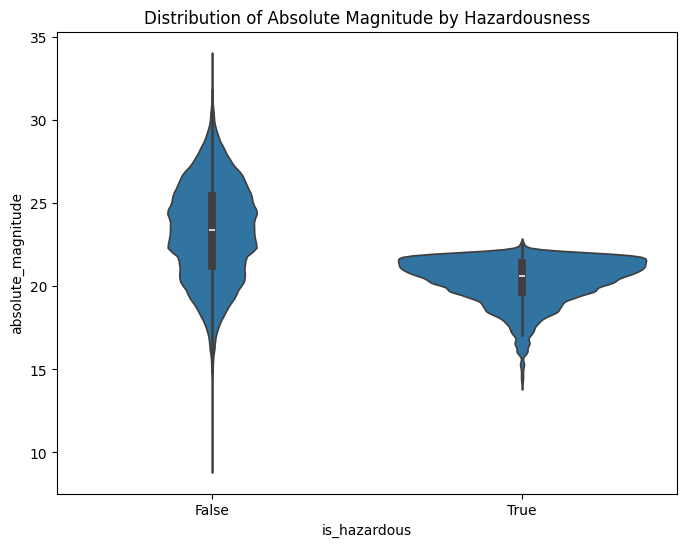

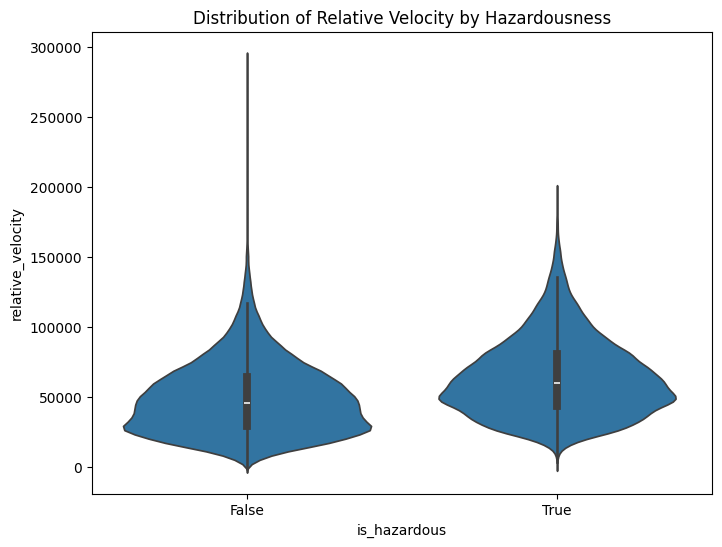

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='is_hazardous', y='absolute_magnitude', data=copy_data)
plt.title('Distribution of Absolute Magnitude by Hazardousness')
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(x='is_hazardous', y='relative_velocity', data=copy_data)
plt.title('Distribution of Relative Velocity by Hazardousness')
plt.show()

**identifying outliers**

In [ ]:
Q1 = copy_data[['absolute_magnitude', 'relative_velocity']].quantile(0.25)
Q3 = copy_data[['absolute_magnitude', 'relative_velocity']].quantile(0.75)
IQR = Q3 - Q1

outliers = copy_data[((copy_data[['absolute_magnitude', 'relative_velocity']] < (Q1 - 1.5 * IQR)) | (copy_data[['absolute_magnitude', 'relative_velocity']] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(outliers)


        absolute_magnitude  estimated_diameter_min  estimated_diameter_max  \
124                 19.090                0.404162                0.903733   
133                 22.310                0.091739                0.205135   
139                 19.830                0.287445                0.642747   
203                 20.030                0.262153                0.586192   
218                 20.030                0.262153                0.586192   
...                    ...                     ...                     ...   
337663              20.440                0.217048                0.485333   
337665              22.400                0.088015                0.196807   
337683              19.331                0.361705                0.808798   
337720              21.020                0.166171                0.371569   
337905              20.610                0.200704                0.448787   

        relative_velocity  miss_distance  is_hazardous  
124   

# **Splitting the dataset**

In [ ]:
X = copy_data.drop(columns=['is_hazardous'])
y = copy_data['is_hazardous']

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Applying SMOTE to training data**

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# **Training the models**

In [ ]:
import joblib

Logistic Regression - Accuracy: 0.52, Precision: 0.17, Recall: 0.68, F1-Score: 0.27, AUC-ROC: 0.64


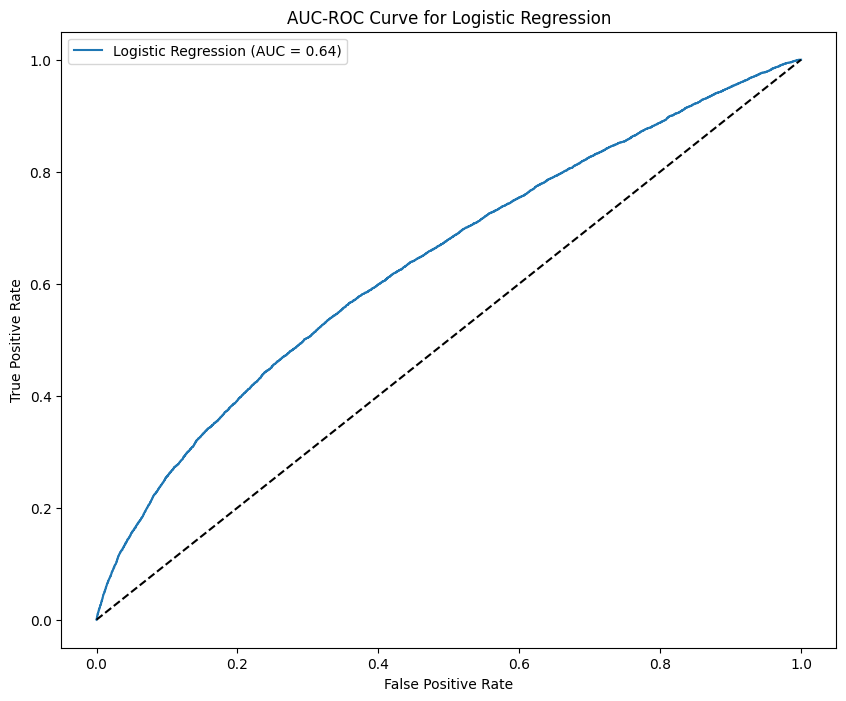

Random Forest - Accuracy: 0.91, Precision: 0.67, Recall: 0.66, F1-Score: 0.66, AUC-ROC: 0.95


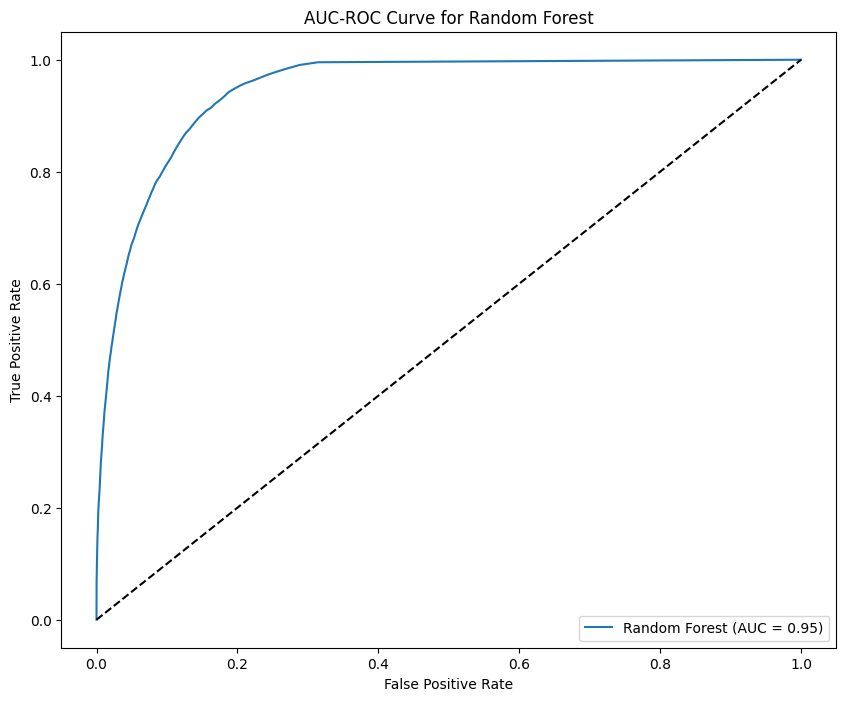

In [ ]:
def train_and_evaluate(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    accuracy = accuracy_score(y_test, y_pred)

    print(f'{model_name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}, AUC-ROC: {auc:.2f}')

    joblib.dump(model, f'{model_name}.pkl')

    # Plot AUC-ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'AUC-ROC Curve for {model_name}')
    plt.legend()
    plt.show()

logistic_regression = LogisticRegression()
train_and_evaluate(logistic_regression, 'Logistic Regression', X_train_resampled, y_train_resampled, X_test, y_test)

random_forest = RandomForestClassifier()
train_and_evaluate(random_forest, 'Random Forest', X_train_resampled, y_train_resampled, X_test, y_test)

# svm = SVC(probability=True)
# train_and_evaluate(svm, 'Support Vector Machine', X_train_resampled, y_train_resampled, X_test, y_test)


Logistic Regression's accuracy: 52%<br>
Random Forest's accuracy: 91%

In [ ]:
loaded_model1 = joblib.load('Logistic Regression.pkl')
loaded_model2 = joblib.load('Random Forest.pkl')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:04:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.80, Precision: 0.37, Recall: 0.85, F1-Score: 0.52, AUC-ROC: 0.90


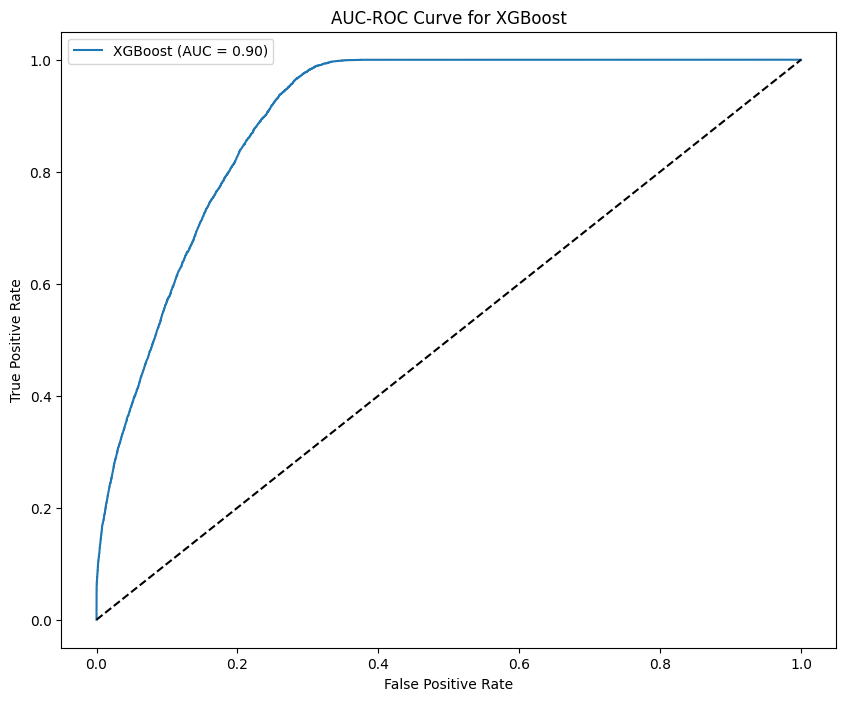

In [38]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
train_and_evaluate(xgb, 'XGBoost', X_train_resampled, y_train_resampled, X_test, y_test)


In [39]:
loaded_model3 = joblib.load('XGBoost.pkl')

XG's accuracy: 80%

Decision Tree - Accuracy: 0.90, Precision: 0.61, Recall: 0.65, F1-Score: 0.63, AUC-ROC: 0.79


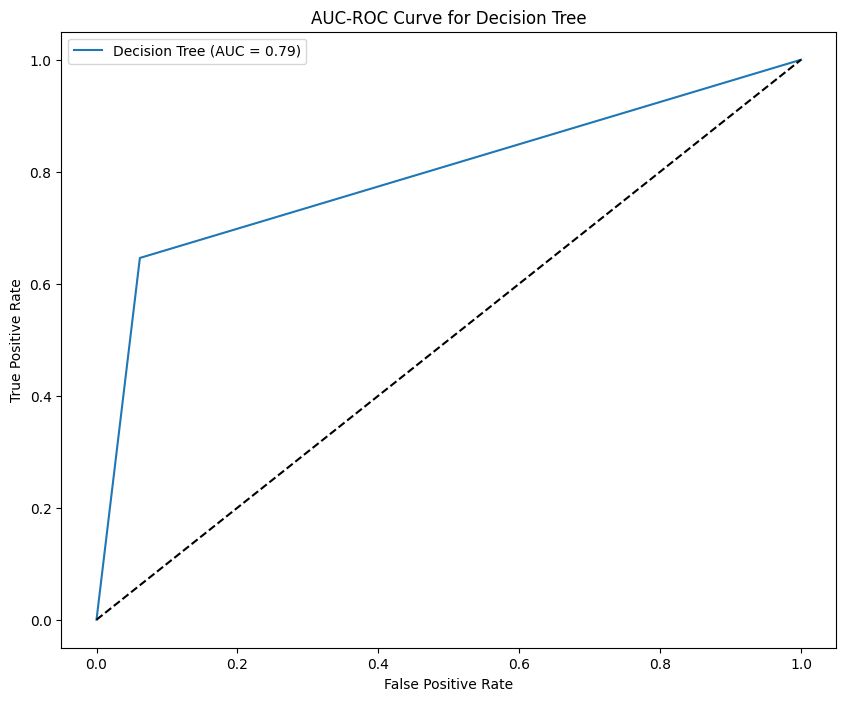

In [40]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
train_and_evaluate(tree, 'Decision Tree', X_train_resampled, y_train_resampled, X_test, y_test)

Decision Tree's accuracy: 90%

In [41]:
loaded_model4 = joblib.load('Decision Tree.pkl')

K-Nearest Neighbors - Accuracy: 0.65, Precision: 0.18, Recall: 0.46, F1-Score: 0.25, AUC-ROC: 0.60


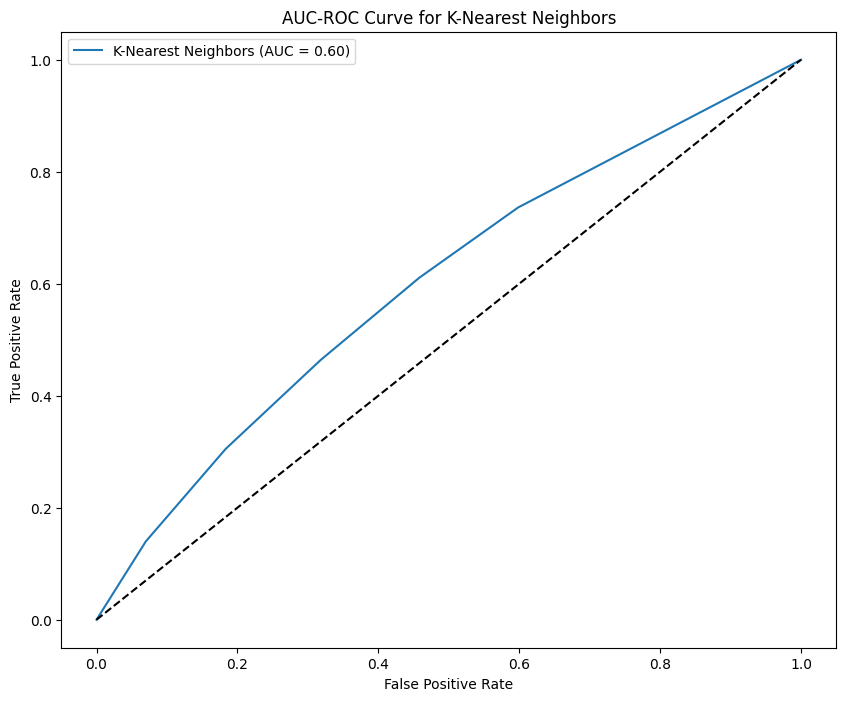

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate(knn, 'K-Nearest Neighbors', X_train_resampled, y_train_resampled, X_test, y_test)

KNN'S accuracy: 65%

# **Random Forest gave the highest accuracy of 91%**

Determining the features that had a high effect on the model's performance

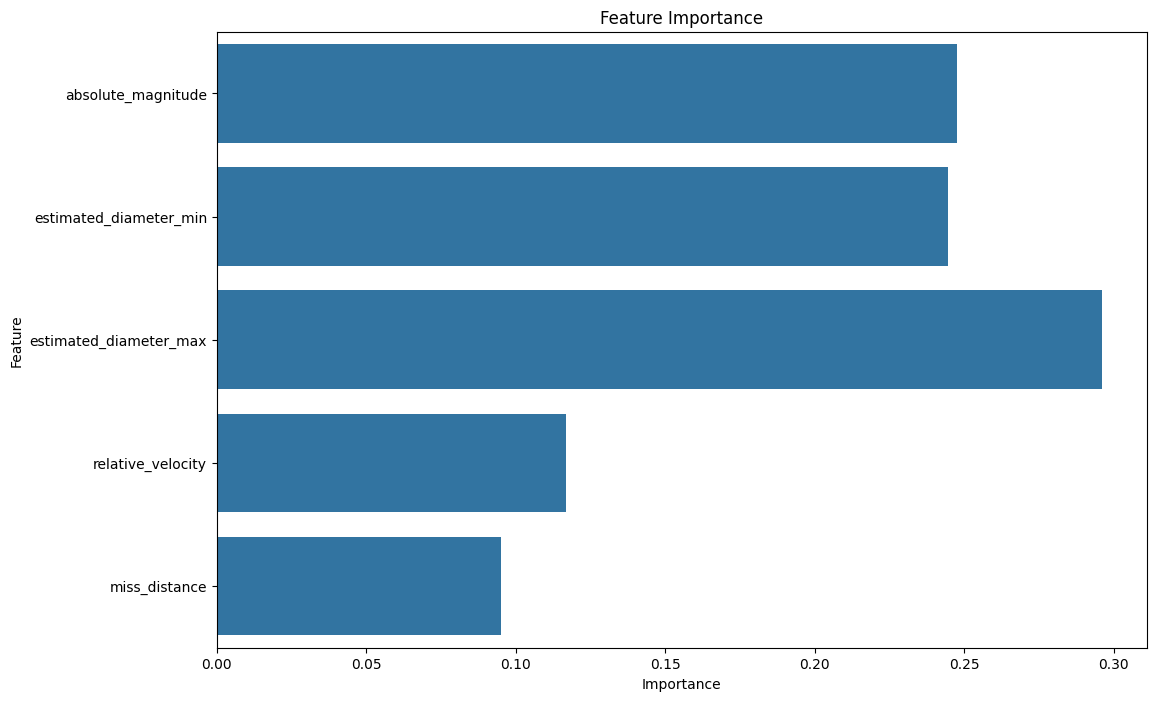

In [44]:
feature_importances = loaded_model2.feature_importances_
features = X_train_resampled.columns

importance_dataframe = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_dataframe.sort_values(by='Importance', ascending=False)

# Plot the histogram
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_dataframe)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()